In [1]:
!pip install --upgrade diffusers transformers scipy --quiet
!pip install accelerate --quiet
!pip install ultralytics==8.0.196 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 4.3 MB/s eta 0:00:00


In [2]:
import torch
import ultralytics
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline

In [3]:
class Generate:
  def __init__(self, prompt, num_imgs):
    self.prompt = prompt
    self.num_imgs = num_imgs
    self.model = YOLO('yolov8n.pt')
    self.model_id = "CompVis/stable-diffusion-v1-4"
    self.device = "cuda"
    self.stable_mod = StableDiffusionPipeline.from_pretrained(self.model_id, torch_dtype=torch.float16)
    self.pipe = self.stable_mod.to(self.device)

  def image_filter(self):
    for i in range(5):
      results = self.model.predict(f"generated_image_{i}.png", conf=0.25, save=True)

  def show_images(self):
    for i in range(5):
      img = Image.open(f"/content/runs/detect/predict/generated_image_{i}.png")
      plt.imshow(img)
      plt.show()

  def generate_save_imgs(self):
    self.num_imgs = 5
    output_images = []

    for _ in range(self.num_imgs):
      result = self.pipe(self.prompt)
      output_images.append(result.images[0])

    for i, image in enumerate(output_images):
      image.save(f"generated_image_{i}.png")

    self.image_filter()

    self.show_images()

Enter the prompt: Generate a visually captivating series of images showcasing a dynamic laptop photoshoot, featuring diverse lighting conditions, innovative angles, and compelling compositions. Highlight the laptop in a way that emphasizes their design and style, ensuring a balance between creativity and product visibility.
Enter the number of images you want to generate: 5


100%|██████████| 6.23M/6.23M [00:00<00:00, 78.1MB/s]
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


image 1/1 /content/generated_image_0.png: 640x640 1 person, 1 laptop, 11.9ms
Speed: 23.8ms preprocess, 11.9ms inference, 132.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/generated_image_1.png: 640x640 1 person, 4 laptops, 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/generated_image_2.png: 640x640 1 laptop, 6.9ms
Speed: 2.6ms preprocess, 6.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/generated_image_3.png: 640x640 7 persons, 4 tvs, 13 laptops, 1 keyboard, 7.2ms
Speed: 2.7ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/generated_image_4.png: 640x640 1 laptop, 7.2ms
Speed: 2.5ms preprocess, 7.2ms inference, 1.4ms postprocess per image at sh

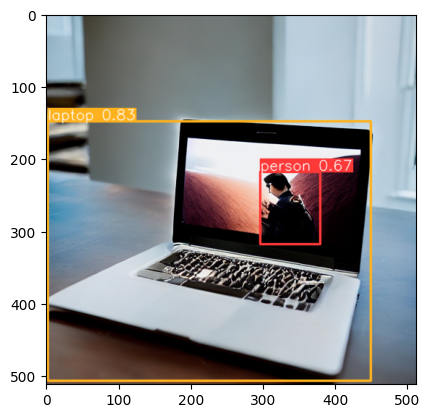

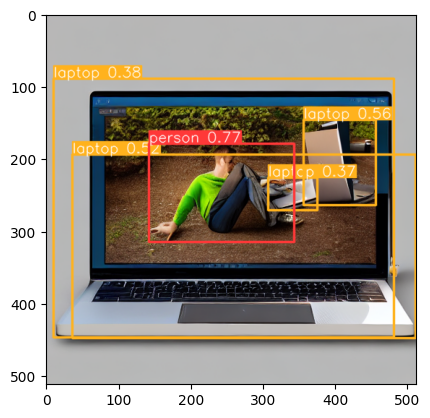

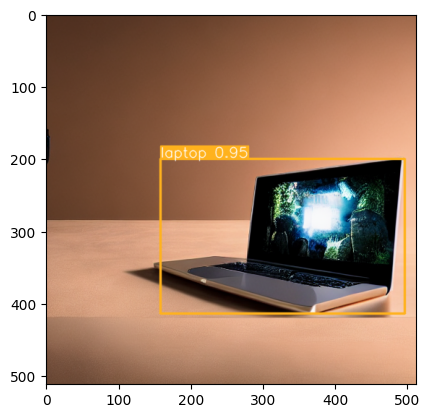

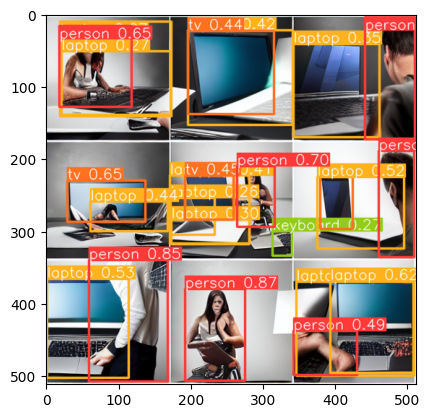

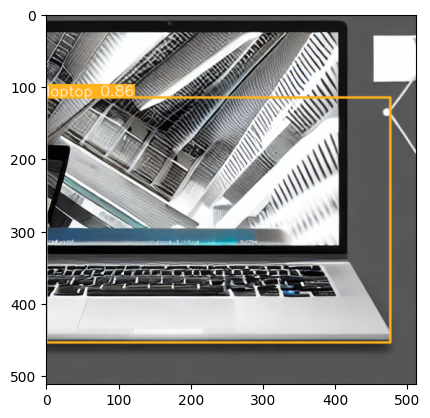

In [4]:
def call():
  prompt = input('Enter the prompt: ')
  num_imgs = input('Enter the number of images you want to generate: ')
  gen = Generate(prompt, num_imgs)
  gen.generate_save_imgs()
call()